In [19]:
from numflow import*
from MyOperators import build_Ll, Sigma, Ll_from_params, Ll_bosons
#from blockDiagonalization import create_random_block_diag, create_permutation_matrix
from plotStats import plot_complex_matrix
import warnings
counter = 1
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
#import os 
#os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


L_d(0) 2-fold degenerate
L 2-fold degenerate
[[ 0.+0.j -1.+0.j -1.+0.j  0.+0.j]
 [ 1.+0.j  0.+2.j  0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j  0.-2.j -1.+0.j]
 [ 0.+0.j  1.+0.j  1.+0.j  0.+0.j]]


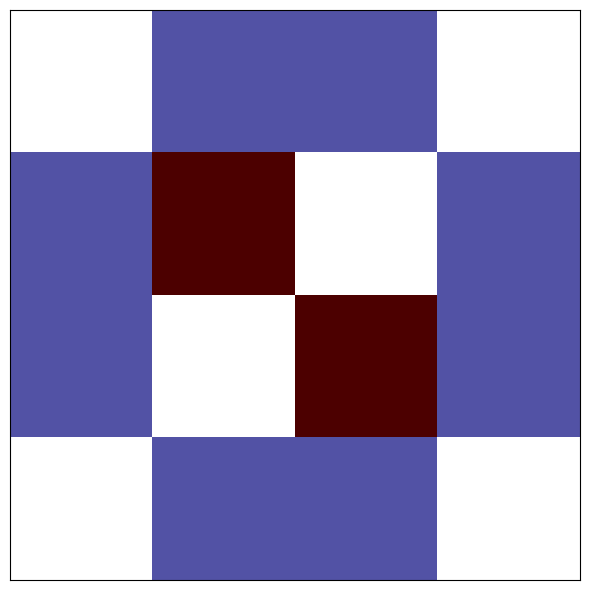

In [15]:
LL =np.around(Ll_from_params(0,[0,1,1],0))
print(LL)
plot_complex_matrix(LL)

2 Bosons. gamma =[0, 0.1], j_r=0.001.  g = 0.0
2 Bosons. gamma =[0, 0.1], j_r=0.001.  g = 0.02
2 Bosons. gamma =[0, 0.1], j_r=0.001.  g = 0.2
2 Bosons. gamma =[0.1, 0.1], j_r=0.001.  g = 0.0
2 Bosons. gamma =[0.1, 0.1], j_r=0.001.  g = 0.02
2 Bosons. gamma =[0.1, 0.1], j_r=0.001.  g = 0.2
2 Bosons. gamma =[0.5, 0.1], j_r=0.001.  g = 0.0
2 Bosons. gamma =[0.5, 0.1], j_r=0.001.  g = 0.02
2 Bosons. gamma =[0.5, 0.1], j_r=0.001.  g = 0.2


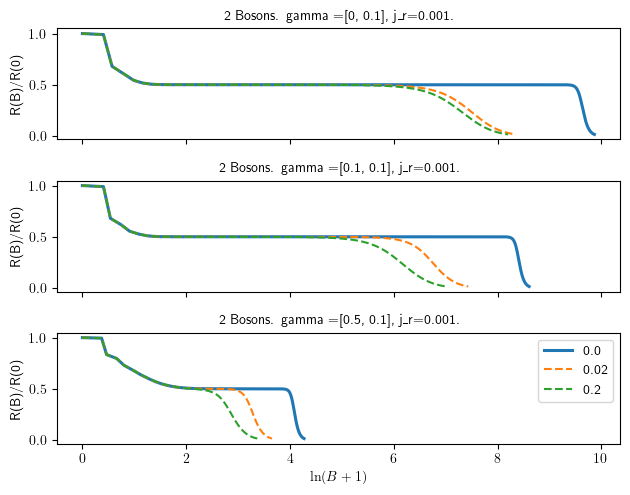

In [21]:
gg = [0.0,0.02,0.2];
params = [[[0,0.1],0.001],[[0.1,0.1],0.001],[[0.5,0.1],0.001]]
fig, ax = plt.subplots(len(params), 1, sharex=True)
for x in range(len(params)):
    L0, string_note = Ll_bosons(params[x][0],params[x][1],2)
    lls, Rsums = [],[]
    for index in range(len(gg)):
        filename=string_note+" g = "+str(gg[index])
        L_l, ll, Rsum = evolve_operator(L0,0.01,gg[index])
        # Saving data with header
        print(filename)
        np.savez(filename,x=ll, y = Rsum/Rsum[0])
        Rsums.append(Rsum)
        lls.append(ll)
        if index==0:
            ax[x].plot(np.log1p(lls[index]),Rsums[index],linewidth=2.2)
        else:
            ax[x].plot(np.log1p(lls[index]),Rsums[index],"--")
        ax[x].set_ylabel('R(B)/R(0)', fontsize=10)
        ax[x].set_title(string_note, fontsize=10)
ax[-1].set_xlabel(r"$\displaystyle \ln(B+1)$", fontsize=10)
ax[-1].legend(gg)
plt.tight_layout(); plt.subplots_adjust(bottom=0.065)
#fig.savefig('NRadii'+str(counter)+'.png', dpi=300)
#counter+=1

dL = 7.305280802863644e-08
dl = 0.5
error = 1.46930899318842e-16
Breaking loop after 270 seconds
3 Bosons. gamma =[0, 0.1], j_r=0.01.  g = 0.01
dL = 3.996221178733329e-07
dl = 0.5
error = 1.371000146488755e-16
Breaking loop after 270 seconds
3 Bosons. gamma =[0, 0.1], j_r=0.01.  g = 0.1
eig0 [-0.0172298+0.5735648j -0.0172298-0.5735648j -0.0544634+0.j
 -0.0146138+0.j        -0.       +0.j        -0.009365 +0.2869784j
 -0.0423705+0.2858915j -0.009365 -0.2869784j -0.0423705-0.2858915j]
eigd_op [-0.0172298+0.5735648j -0.0172298-0.5735648j -0.0544634-0.j
 -0.0141518-0.j        -0.000462 +0.j        -0.009365 +0.2869784j
 -0.0423705+0.2858915j -0.009365 -0.2869784j -0.0423705-0.2858915j]
3 Bosons. gamma =[0.1, 0.1], j_r=0.01.  g = 0.01
dL = 7.570206807432333e-09
dl = 0.5
error = 1.669761740765454e-16
Breaking loop after 270 seconds
3 Bosons. gamma =[0.1, 0.1], j_r=0.01.  g = 0.1
eig0 [-0.1013873+0.3038854j -0.4883881+0.j        -0.1013873-0.3038854j
 -0.4441669-0.j        -0.       -0.j     

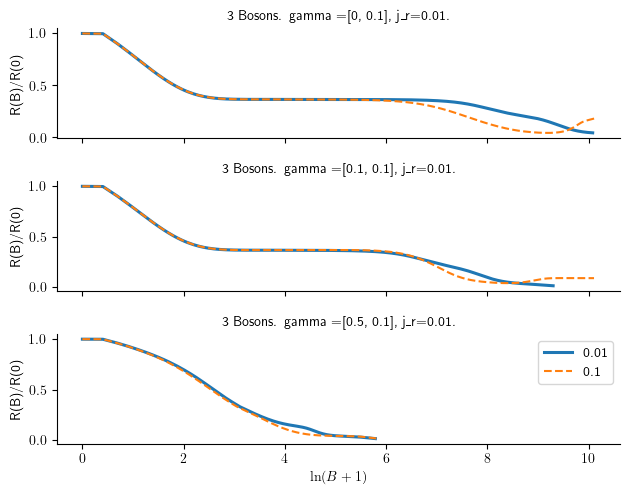

In [22]:
gg = [0.01,0.1];
params = [[[0,0.1],0.01],[[0.1,0.1],0.01],[[0.5,0.1],0.01]]
fig, ax = plt.subplots(len(params), 1, sharex=True) 
for x in range(len(params)):
    L0, string_note = Ll_bosons(params[x][0],params[x][1],3)
    lls, Rsums = [],[]
    for index in range(len(gg)):
        filename=string_note+" g = "+str(gg[index])
        L_final, ll, Rsum = evolve_operator(L0,0.01,gg[index])
        # Saving data with header
        print(filename)
        np.savez(filename,x=ll, y = Rsum/Rsum[0])
        Rsums.append(Rsum)
        lls.append(ll)
        if index==0:
            ax[x].plot(np.log1p(lls[index]),Rsums[index],linewidth=2.2)
        else:
            ax[x].plot(np.log1p(lls[index]),Rsums[index],"--")
        ax[x].set_ylabel('R(B)/R(0)', fontsize=10)
        ax[x].set_title(string_note, fontsize=10)
ax[-1].set_xlabel(r"$\displaystyle \ln(B+1)$", fontsize=10)
ax[-1].legend(gg)
sns.despine()
plt.tight_layout(); plt.subplots_adjust(bottom=0.065)
#fig.savefig('NRadii'+str(counter)+'.png', dpi=300)
#counter+=1

dL = 3.582281878333929e-08
dl = 0.5
error = 9.63484313486243e-17
Breaking loop after 270 seconds
3 Bosons. gamma =[0, 0.1], j_r=0.01.  g = 0.0
dL = 5.7550933951112e-08
dl = 0.5
error = 2.3580796707313903e-16
Breaking loop after 270 seconds
3 Bosons. gamma =[0, 0.1], j_r=0.01.  g = 0.001
dL = 8.552599597679478e-08
dl = 0.5
error = 2.002132485026637e-16
Breaking loop after 270 seconds
3 Bosons. gamma =[0, 0.1], j_r=0.01.  g = 0.01
eig0 [-0.0172305-0.5735645j -0.0172305+0.5735645j -0.0544685-0.j
 -0.0146219-0.j        -0.       -0.j        -0.0423738-0.2858986j
 -0.0093713-0.2869754j -0.0423738+0.2858986j -0.0093713+0.2869754j]
eigd_op [-0.0172305-0.5735645j -0.0172305+0.5735645j -0.0544685+0.j
 -0.0141591+0.j        -0.0004628+0.j        -0.0423738-0.2858986j
 -0.0093713-0.2869754j -0.0423738+0.2858986j -0.0093713+0.2869754j]
3 Bosons. gamma =[0.1, 0.1], j_r=0.01.  g = 0.0
eig0 [-0.0172305-0.5735645j -0.0172305+0.5735645j -0.0544685-0.j
 -0.0146219-0.j        -0.       -0.j        -0.042

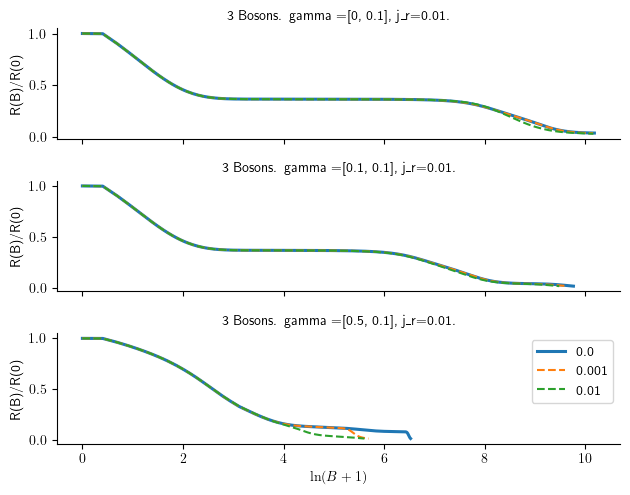

In [21]:
gg = [0.0,0.001,0.01];
params = [[[0,0.1],0.01],[[0.1,0.1],0.01],[[0.5,0.1],0.01]]
fig, ax = plt.subplots(len(params), 1, sharex=True) 
for x in range(len(params)):
    L0, string_note = Ll_bosons(params[x][0],params[x][1],3)
    lls, Rsums = [],[]
    for index in range(len(gg)):
        filename=string_note+" g = "+str(gg[index])
        L_final, ll, Rsum = evolve_operator(L0,0.01,gg[index])
        # Saving data with header
        print(filename)
        np.savez(filename,x=ll, y = Rsum/Rsum[0])
        Rsums.append(Rsum)
        lls.append(ll)
        if index==0:
            ax[x].plot(np.log1p(lls[index]),Rsums[index],linewidth=2.2)
        else:
            ax[x].plot(np.log1p(lls[index]),Rsums[index],"--")
        ax[x].set_ylabel('R(B)/R(0)', fontsize=10)
        ax[x].set_title(string_note, fontsize=10)
ax[-1].set_xlabel(r"$\displaystyle \ln(B+1)$", fontsize=10)
ax[-1].legend(gg)
sns.despine()
plt.tight_layout(); plt.subplots_adjust(bottom=0.065)
#fig.savefig('NRadii'+str(counter)+'.png', dpi=300)
#counter+=1

L_d(0) 2-fold degenerate
The flow is stuck


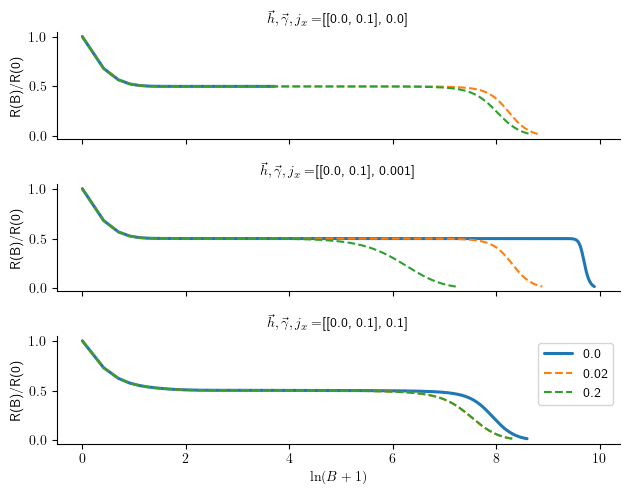

In [44]:
gg = [0.0,0.02,0.2];
params = [[[0,0.1],0.0],[[0.0,0.1],0.001],[[0.0,0.1],0.1]]
fig, ax = plt.subplots(len(params), 1, sharex=True)
for x in range(len(params)):
    L0, string_note = Ll_bosons(params[x][0],params[x][1],2)
    lls, Rsums = [],[]
    for index in range(len(gg)):
        filename=string_note+" g = "+str(gg[index])
        L_final, ll, Rsum = evolve_operator(L0,0.01,gg[index])
        # Saving data with header
        print(filename)
        np.savez(filename+'.txt',x=ll, y = Rsum/Rsum[0])
        Rsums.append(Rsum)
        lls.append(ll)
        if index==0:
            ax[x].plot(np.log1p(lls[index]),Rsums[index],linewidth=2.2)
        else:
            ax[x].plot(np.log1p(lls[index]),Rsums[index],"--")
        ax[x].set_ylabel('R(B)/R(0)', fontsize=10)
        ax[x].set_title(string_note, fontsize=10)
ax[-1].set_xlabel(r"$\displaystyle \ln(B+1)$", fontsize=10)
ax[-1].legend(gg)
sns.despine()
plt.tight_layout(); plt.subplots_adjust(bottom=0.065)
#fig.savefig('NRadii'+str(counter)+'.png', dpi=300)
#counter+=1

L_d(0) 2-fold degenerate
The flow is stuck
The flow is stuck


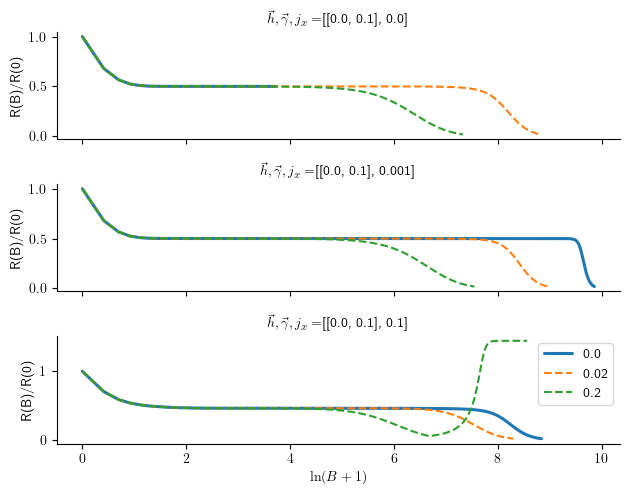

In [4]:
gg = [0.0,0.02,0.2];
params = [[[0.0,0.1],0.0],[[0.0,0.1],0.001],[[0.0,0.1],0.1]]
fig, ax = plt.subplots(len(params), 1, sharex=True)
for x in range(len(params)):
    L0 = Ll_bosons(params[x][0],params[x][1],2)
    centers, radii, lls, Rsums = [],[], [], []
    for index in range(len(gg)):
        L_final, CC,RR, ll, Rsum = evolve_operator(L0,0.01,gg[index])
        Rsums.append(Rsum)
        centers.append(CC)
        radii.append(RR)
        lls.append(ll)
    with sns.axes_style("darkgrid"):
        for index in range(len(gg)):
            if index==0:
                ax[x].plot(np.log1p(lls[index]),Rsums[index]/Rsums[index][0],linewidth=2.2)
            else:
                ax[x].plot(np.log1p(lls[index]),Rsums[index]/Rsums[index][0],"--")
            #ax[0].set_title(r"$\displaystyle \mu(J_{k_1\cdots k_q})$", fontsize=20)
            ax[x].set_ylabel('R(B)/R(0)', fontsize=10)
            #ax[x].set_ylim(0,0.5)
            ax[x].set_title(r"$\displaystyle\vec{h},\vec{\gamma},j_x =$" +str(params[x]), fontsize=10)
ax[-1].set_xlabel(r"$\displaystyle \ln(B+1)$", fontsize=10)
ax[-1].legend(gg)
sns.despine()
plt.tight_layout(); plt.subplots_adjust(bottom=0.065)
#fig.savefig('NRadii'+str(counter)+'.png', dpi=300)
#counter+=1

In [32]:
v = np.array([[ 3, -6 +9j,  -11j, -3]])
rho_o = v.reshape((2, 2), order='F')
rho1 = Llrho(H0,L_list,rho_o) #-1j*commutator(H0,rho_o)+l@rho_o@l_dagger-0.5*anticommutator(l_dagger_l,rho_o)
rho_vectorized = rho_o.flatten(order='F')  # 'F' stands for Fortran-style column-major flattening
v1 = Ll@rho_vectorized
v1_original = v1.reshape((2, 2), order='F')

print(v1_original)
print(rho1)

E, V = LA.eig(Ll)


for i in range(dim**2):
    v = V[:,i]
    rho_o = v.reshape((2, 2), order='F')
    rho1 = Llrho(H0,L_list,rho_o)
    rho_vectorized = rho_o.flatten(order='F')  # 'F' stands for Fortran-style column-major flattening
    v1 = Ll@rho_vectorized
    v1_original = v1.reshape((2, 2), order='F')
    
    print(v1_original)
    print(rho1)

[[ 0.32539569+0.3796283j  -0.92195445-1.84390889j]
 [-0.3796283 +0.32539569j -0.32539569-0.3796283j ]]
[[ 0.32539569+0.3796283j  -0.92195445-1.84390889j]
 [-0.3796283 +0.32539569j -0.32539569-0.3796283j ]]
[[ 6.66133815e-16+1.78729303e-16j -1.39365438e-16+0.00000000e+00j]
 [ 3.31580859e-16+5.55111512e-17j -6.66133815e-16-1.78729303e-16j]]
[[ 6.42445017e-16+1.66533454e-16j -1.39365438e-16-1.43270325e-17j]
 [ 3.31580859e-16-1.43270325e-17j -6.42445017e-16-1.66533454e-16j]]
[[ 1.26491106-8.32667268e-17j  0.63245553+4.44089210e-16j]
 [ 0.63245553+3.33066907e-16j -1.26491106+8.32667268e-17j]]
[[ 1.26491106-1.38777878e-16j  0.63245553+4.30211422e-16j]
 [ 0.63245553+3.19189120e-16j -1.26491106+1.38777878e-16j]]
[[ 0.32539569-0.3796283j  -0.3796283 -0.32539569j]
 [-0.92195445+1.84390889j -0.32539569+0.3796283j ]]
[[ 0.32539569-0.3796283j  -0.3796283 -0.32539569j]
 [-0.92195445+1.84390889j -0.32539569+0.3796283j ]]


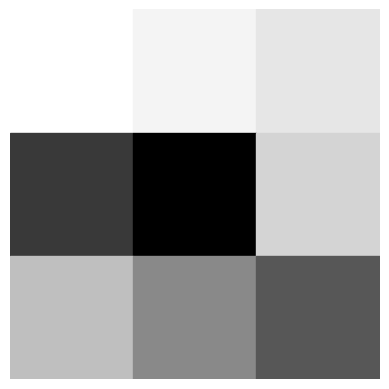

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_color_coded_matrix(matrix, cmap='Greys'):
    """
    Plots a matrix with colors indicating the absolute values of the elements.

    Parameters:
        matrix (np.array): A 2D numpy array.
        cmap (str): Colormap to use for coloring the values based on their magnitude.
    """
    # Create an array of absolute values and normalize
    abs_matrix = np.abs(matrix)
    norm = colors.Normalize(vmin=np.min(abs_matrix), vmax=np.max(abs_matrix))

    fig, ax = plt.subplots()
    colormap = plt.colormaps[cmap]  # Access the colormap using plt.colormaps

    # Iterate over data dimensions and create text annotations.
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            color = colormap(norm(abs_matrix[i, j]))  # Use the colormap directly
            rect = plt.Rectangle([j, -i-1], 1, 1, color=color)  # Ensure the y-position is correctly adjusted
            ax.add_patch(rect)

    ax.set_xlim(0, matrix.shape[1])
    ax.set_ylim(-matrix.shape[0], 0)
    ax.set_aspect('equal')

    # Hide the axes
    ax.axis('off')
    plt.show()




In [ ]:
#evolve 2
from numflow import*
import warnings
counter = 1
#import os 
#os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import matplotlib
matplotlib.rcParams['text.usetex'] = True

# Define Pauli matrices and the identity matrix
'''sigma[i] are pauli matrices with sigma[0] the 2x2 identity
build_Ll(H,L_list) creates the Liouvillian
Llrho(H,L_list,rho) acts the Liouvillian on some rho
hinton(matrix) plots the hinton diagram
gershgorin_circles(matrix) returns centers,radii
'''


def evolve_operator(L0,dl = 1e-2,g=0):
    min_dl = 1e-6; max_dl = 0.5; tol = 1e-4
    L_l = np.copy(L0)
    dim = L_l.shape[0]
    I = np.eye(dim)
    G = np.diag(np.random.rand(dim)); G = L_l*(I+g*G*LA.norm(L_l*I)/LA.norm(G)) 
    #CC = [[] for i in range(dim)]; RR = [[] for i in range(dim)] 
    Rsum = []; RsumN = []
    start_time = time.time()  # Record the start time
    ll = [0]
    n_step = 0
    counter = 0
    while True:
        centers,radii = gershgorin_circles(L_l); Rsum.append(sum(radii)); RsumN.append(Rsum[n_step]/Rsum[0]) 
        #for i in range(dim): RR[i].append(radii[i]); CC[i].append(centers[i]) 
        if RsumN[n_step]<=.014: 
            #Now check if the diagonal is close to what it should be
            eig0,eigd = eigvals(L0), eigvals(L_l*I)
            min_sum, op_perm = min_sum_permutation(eig0, eigd)
            eigd_op = [eigd[op_perm[k]] for k in range(dim) ]
            rel_error = [abs(eig0[k]-eigd_op[k])/np.max([abs(eig0[k]),abs(eigd_op[k]),1e-1*abs(sum(eig0))/dim]) for k in range(dim)]
            rel_below = [bool(r < 0.01) for r in rel_error]
            if False not in rel_below: 
                break
            else:
                counter+=1
            if counter >5: 
                print("eig0", np.around(eig0,7))
                print("eigd_op", np.around(eigd_op,7))
                break
        
        L_temp = np.copy(L_l)
        L_l = evolve2(evolve2(L_l,G,I,dl/2),G,I,dl/2)
        dL = LA.norm(L_l-L_temp)
        #one bigger step
        L_big = evolve2(L_temp,G,I,dl)
        error = LA.norm(L_l-L_big)
        if n_step>40 and sum(np.absolute(np.gradient(RsumN)[n_step-10:n_step]))<=1e-14:           
            permuted_matrix, disconnected_subblocks = permute_to_block_diagonal(np.around(L_l,10))
            #print("Permuted Matrix:")
            #print(process_complex_list(permuted_matrix))
            #print("\nSub-Blocks:")
            print("The flow is stuck due to "+str(len(disconnected_subblocks))+"disconnected subblocks");
            break
        elif error==0 and dL>1e-15:
            dl = max_dl
        elif error < tol and dL>1e-15:
            dl = min(max_dl, dl * (tol / error)**(1/3))
        else:
            dl = max(min_dl, dl * (tol / error)**(1/3))
        #To do: add check if the radius is increasing, then we should not increase the step-size, but then perhapse both are bad
        if time.time() - start_time > dim*30: 
            print("dL =",dL)
            print("dl =",dl)
            print("error =",error)
            print("Breaking loop after "+str(dim*30)+" seconds");break
        ll.append(ll[n_step]+dl)
        n_step+=1  

    return L_l, ll, RsumN #CC, RR

def magnus_S2(L, dl,G):
    dim = L.shape[0]
    I = np.eye(dim)
    ηl = commutator(L.conj().T,L - G)
    #L_intR = L - G
    # Magnus expansion to second order
    dL = commutator(ηl,L); dL_intR = dL-dL*I;dη = commutator(dL.conj().T,L-G) + commutator(L.conj().T,dL)
    ddL = commutator(dη,L) + commutator(ηl,dL); ddη = commutator(ddL.conj().T,L-G) + 2*commutator(dL.conj().T,dL) + commutator(L.conj().T,ddL)
    ddζ = (2*ddη - commutator(ηl,dη))/6; 
    zeta = ηl + dη*dl/2+ dl**2*ddζ/2
    Ohm = zeta*dl
    O2 = Ohm@Ohm
    dS = np.matmul(12*I + 6*Ohm + O2, inv(12*I - 6*Ohm + O2) )  #exp_pade S(l+dl,l) Savits eq 31
    return dS
def evolve2(L_l,G,I,dl):
    L_intR = -G+L_l
    dS = magnus_S2(L_l, dl,G); dSinv_l =inv(dS)
    L_l = dS @ L_l @ dSinv_l
    return L_l

def Ll_from_params(h_vec,gamma_vec,j_r): #h_vec = [1,0.1,0.1]; gamma_vec
    H0 = sum(h_vec[i]*Sigma[i+1] for i in range(3)) #choosing H0 = sigma_z leads to a degeneracy meaning we do not diagonalize the Hamiltonian
    M_r = (np.random.random((2,2))+1j*np.random.random((2,2)));M_r = LA.norm(sigma_x)*M_r/LA.norm(M_r)
    L_list = [sum(gamma_vec[i]*Sigma[i] for i in range(4)),j_r*M_r]
    L0 = build_Ll(H0,L_list); L0 = L0/LA.norm(L0)
    unique_d, counts_d = np.unique(np.around(np.diag(L0),9), return_counts=True)
    unique_0, counts_0 = np.unique(np.around(eigvals(L0),9), return_counts=True)
    if 2 in counts_d: print("L_d(0) 2-fold degenerate")
    if 2 in counts_0: print("L 2-fold degenerate")
    return L0
def Ll_bosons(gamma_vec,j_r,N, omega=1): #h_vec = [1,0.1,0.1]; gamma_vec
    H0 = omega*n(N) #choosing H0 = sigma_z leads to a degeneracy meaning we do not diagonalize the Hamiltonian
    M_r = (np.random.random((N,N))+1j*np.random.random((N,N)));M_r = LA.norm(n(N))*M_r/LA.norm(M_r)
    L_list = [gamma_vec[0]*X(N)+gamma_vec[1]*P(N),j_r*M_r]
    L0 = build_Ll(H0,L_list); L0 = L0/LA.norm(L0)
    unique_d, counts_d = np.unique(np.around(np.diag(L0),9), return_counts=True)
    degen_d = [x for x in counts_d if x != 1]
    unique_0, counts_0 = np.unique(np.around(eigvals(L0),9), return_counts=True)
    degen_0 = [x for x in counts_0 if x != 1]
    string_note = str(N)+" Bosons. "+"gamma =" +str(gamma_vec)+", j_r="+str(j_r)+". "
    if len(degen_d)!=0: string_note +="L_d(0) degenacy:"+str(degen_d)+". "
    if len(degen_0)!=0: string_note +="L degeneracy:"+str(degen_0)+". "
    return L0, string_note